<a href="https://colab.research.google.com/github/anazantoro/Project-PersonalizedLearningPath/blob/main/V3_Notebook_Predict_Personalized_Student_Learning_Category_SimpleRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import sys
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.layers import Lambda
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Dependencies Version

In [2]:
print("Python Version:", sys.version)
print("NumPy Version:", np.__version__)
print("Pandas Version:", pd.__version__)
print("Scikit-learn Version:", sklearn.__version__)
print("TensorFlow Version:", tf.__version__)

Python Version: 3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]
NumPy Version: 2.0.2
Pandas Version: 2.2.2
Scikit-learn Version: 1.6.1
TensorFlow Version: 2.18.0


# Load Dataset

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/anazantoro/Project-PersonalizedLearningPath/refs/heads/main/Dataset/students_personalized_scoring_1000_balanced.csv")

In [25]:
data.head()

,UI/UX,Programming,Operational,Data Science,Cybersecurity,Quality Assurance,Computer Network,Project Management,Product Manager,Entrepreneur,Business/Commerce/Ideation,Label
0,0.640000,0.740000,0.710000,0.720000,0.690000,0.620000,0.610000,1.000000,0.770000,0.750000,0.870000,Project Management
1,0.950000,0.920000,0.920000,0.720000,0.630000,0.760000,0.670000,0.880000,0.740000,0.990000,0.860000,Entrepreneur
2,0.706284,0.974739,0.838596,0.680529,0.614474,0.646628,0.741859,0.662647,0.644792,0.662391,0.696409,Programming
3,0.640000,0.860000,0.690000,0.850000,0.860000,0.660000,0.620000,0.910000,0.780000,0.620000,1.000000,Business/Commerce/Ideation
4,0.850000,0.610000,0.930000,0.710000,0.880000,0.750000,0.700000,0.700000,0.910000,0.740000,0.940000,Business/Commerce/Ideation


# Pre-processing

In [4]:
X = data.iloc[:, :-1].values
y = np.argmax(X, axis=1)

In [19]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.3, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

X_train_reshaped = X_train_smote.reshape((X_train_smote.shape[0], 1, X_train_smote.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

y_train_sparse = y_train_smote
y_test_sparse = y_test

In [20]:
X_train_reshaped.shape

(528, 1, 11)

# Modelling

In [21]:
model = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(1, 11)),
    Dense(32, activation='relu'),
    Dense(11, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train_reshaped,
    y_train_sparse,
    epochs=100,
    batch_size=32,
    validation_data=(X_test_reshaped, y_test_sparse)
)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.1589 - loss: 2.4085 - val_accuracy: 0.1635 - val_loss: 2.3791
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2104 - loss: 2.3635 - val_accuracy: 0.1875 - val_loss: 2.3437
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2286 - loss: 2.3230 - val_accuracy: 0.2692 - val_loss: 2.3127
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2767 - loss: 2.2828 - val_accuracy: 0.2933 - val_loss: 2.2678
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2863 - loss: 2.2404 - val_accuracy: 0.3269 - val_loss: 2.2169
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3125 - loss: 2.1887 - val_accuracy: 0.3558 - val_loss: 2.1644
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3780 - loss: 2.1314 - val_accuracy: 0.4087 - val_loss: 2.1123
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4068 - loss: 2.0725 - val_accuracy: 0.4231 - val_loss: 2

# Training

# Evaluation

In [22]:
categories = ['UI/UX', 'Programming', 'Operational', 'Data Science', 'Cybersecurity',
              'Quality Assurance', 'Computer Network', 'Project Management',
              'Product Manager', 'Entrepreneur', 'Business/Commerce/Ideation']

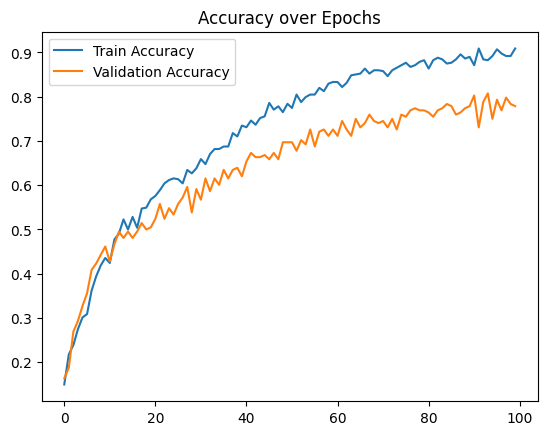

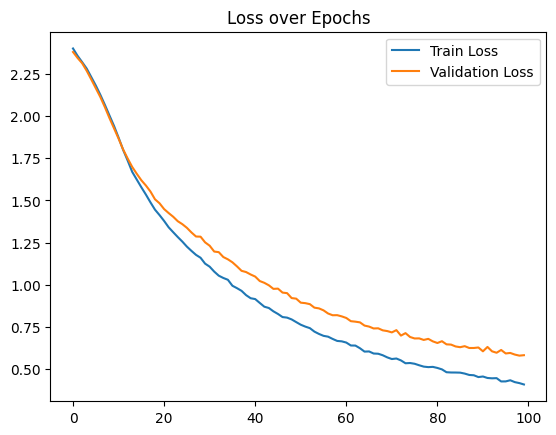

In [23]:
import matplotlib.pyplot as plt

# Akurasi
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


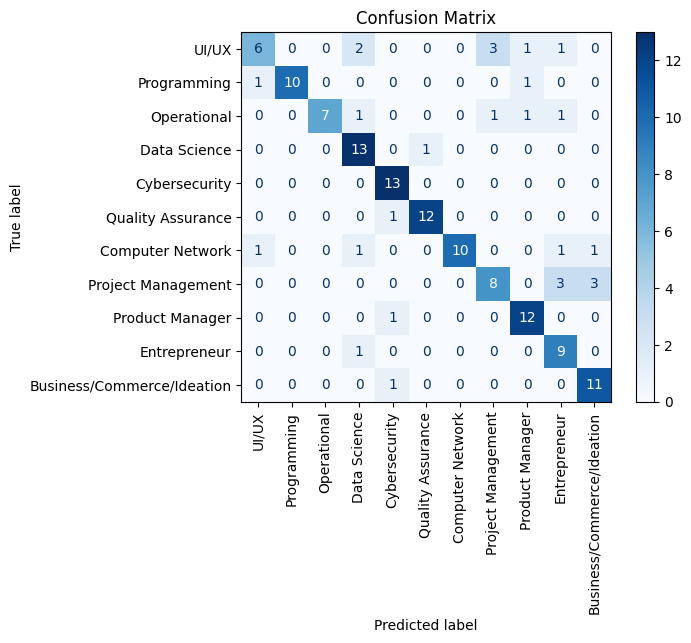

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_probs = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()

# Testing Model

Masukkan skor untuk masing-masing kategori (0.0 - 1.0):
UI/UX: 0.7
Programming: 0.5
Operational: 0.4
Data Science: 0.3
Cybersecurity: 0.5
Quality Assurance: 0.6
Computer Network: 0.2
Project Management: 0.1
Product Manager: 0.4
Entrepreneur: 0.6
Business/Commerce/Ideation: 0.1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step

Top-3 Predictions:
UI/UX: 0.5529
Quality Assurance: 0.1996
Entrepreneur: 0.1553


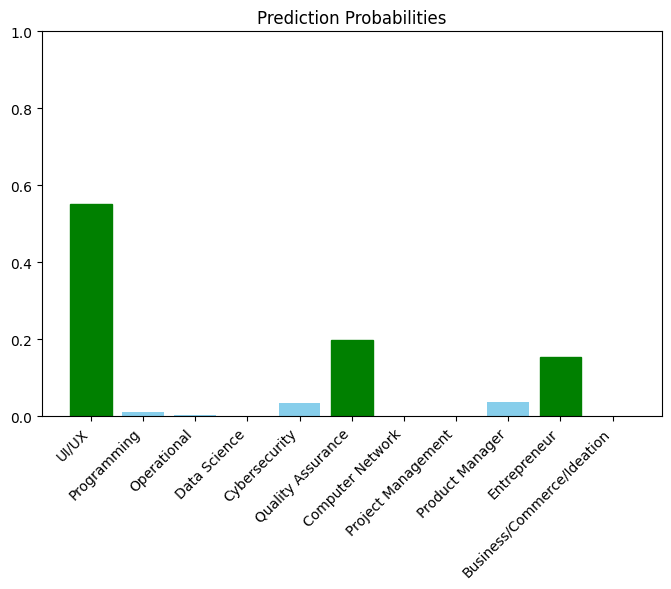

In [24]:
def predict_and_show(new_data, model, categories, top_k=3):
    new_data = np.expand_dims(new_data, axis=1)
    prediction = model.predict(new_data)[0]
    sorted_indices = prediction.argsort()[::-1]

    print(f"\nTop-{top_k} Predictions:")
    for i in range(top_k):
        idx = sorted_indices[i]
        print(f"{categories[idx]}: {prediction[idx]:.4f}")

    # Optional: Plot
    plt.figure(figsize=(8, 5))
    bars = plt.bar(categories, prediction, color='skyblue')
    for i, bar in enumerate(bars):
        if i in sorted_indices[:top_k]:
            bar.set_color('green')
    plt.title("Prediction Probabilities")
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)
    plt.show()

# Fungsi untuk input manual skor
def manual_input():
    scores = []
    print("Masukkan skor untuk masing-masing kategori (0.0 - 1.0):")
    for category in categories:
        while True:
            try:
                value = float(input(f"{category}: "))
                if 0.0 <= value <= 1.0:
                    scores.append(value)
                    break
                else:
                    print("Masukkan angka antara 0.0 sampai 1.0!")
            except ValueError:
                print("Masukkan angka yang valid!")
    return np.array([scores])

# Fungsi prediksi
def predict_and_show_manual_input(model):
    user_input = manual_input()
    predict_and_show(user_input, model, categories)

# Panggil fungsi ini untuk mulai input
predict_and_show_manual_input(model)

# Save Model

In [ ]:
# model.save("model.h5")